# INDIVIDUAL SCRAP VS TOTAL SCRAP

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
%cd D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed


In [20]:
df = pd.read_csv("data.csv")
df.head()

,FECHA,TURNO,GRUPO,MÁQ.,CODIGO,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,NOMBRE_DIA
0,2021-12-01,Mañana,B,EB G1,0,0,0.000,0.00,1,Wednesday
1,2021-12-01,Mañana,B,EB G2,"IBT24,5X35C0F0S",4,64.550,86.25,1,Wednesday
2,2021-12-01,Mañana,B,EB G3,IBT17X40G1F0SO,8,194.770,12.40,1,Wednesday
3,2021-12-01,Mañana,B,EB G4,IBT17X30G1F0S2,8,295.776,11.85,1,Wednesday
4,2021-12-01,Mañana,B,EB-17,0,0,0.000,0.00,1,Wednesday


In [21]:
df_B = df.groupby('MÁQ.').sum()
df_B.drop('DIA',inplace = True, axis = 1)
df_B

,PRODUCCION (PZAS),TOTAL KG,SCRAP
MÁQ.,,,
EB 120,971,23432.213,1331.60
EB 121,148,54850.490,6826.78
EB G1,469,9404.216,769.75
EB G2,498,9999.206,1896.40
EB G3,144,5954.846,950.83
...,...,...,...
EB-123,302,4064.046,425.35
EB-124,923,88547.480,5427.45
EB-125,1813,85619.538,5205.40


In [22]:
total_scrap = df_B['SCRAP'].sum()
total_scrap

40072.83

In [23]:
df_B['SCRAP/TOTAL SCRAP'] = df_B['SCRAP'].apply(lambda x: (x/total_scrap)*100 )
df_B.sort_values(by = ['SCRAP/TOTAL SCRAP'],ascending = False, inplace = True )
df_B

,PRODUCCION (PZAS),TOTAL KG,SCRAP,SCRAP/TOTAL SCRAP
MÁQ.,,,,
EB 121,148,54850.490,6826.78,17.035932
EB-124,923,88547.480,5427.45,13.543965
EB-125,1813,85619.538,5205.40,12.989849
EB G2,498,9999.206,1896.40,4.732384
EB 120,971,23432.213,1331.60,3.322950
...,...,...,...,...
EB-073,0,0.000,0.00,0.000000
EB-072,0,0.000,0.00,0.000000
EB-071,0,0.000,0.00,0.000000


In [24]:
df_B.index[0:15]

Index(['EB 121', 'EB-124', 'EB-125', 'EB G2', 'EB 120', 'EB-118', 'EB-075',
       'EB-122', 'EB-17', 'EB-18', 'EB G3', 'EB-117', 'EB-053', 'EB-111',
       'EB G1'],
      dtype='object', name='MÁQ.')

In [25]:
list_B = df_B.index[0:15]

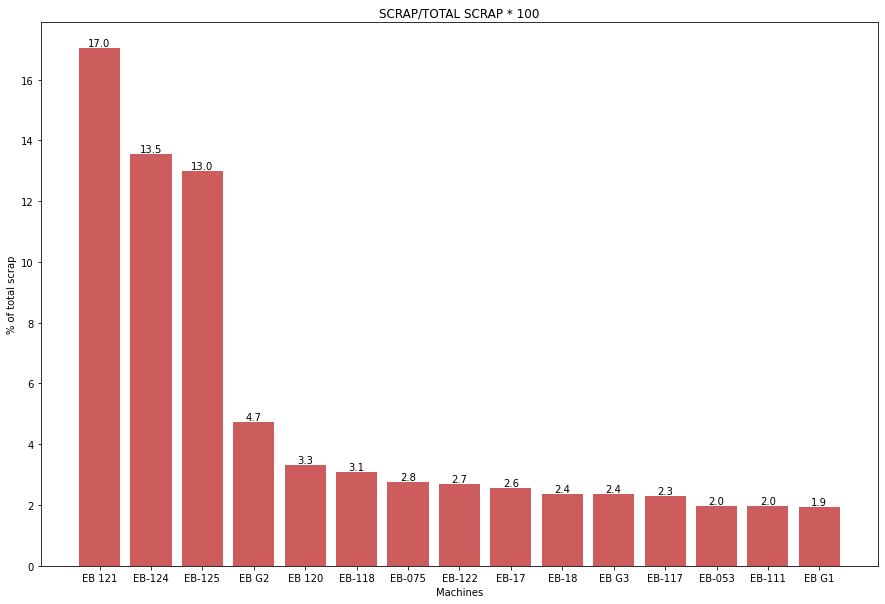

In [26]:
fig, ax = plt.subplots(figsize = [15,10])

x_pos = list_B
y_pos = df_B['SCRAP/TOTAL SCRAP'].head(15)

bars = ax.bar(x_pos, y_pos,color = 'indianred', alpha = 1 ,linewidth = 1)
ax.set_xlabel('Machines')
ax.set_ylabel('% of total scrap')
ax.set_title('SCRAP/TOTAL SCRAP * 100')

ax.bar_label(bars, label_type = "edge", fmt='%0.1f')

#plt.show()
plt.savefig('scrap_vs_total_scrap.pdf')

# SCRAP TENDENCY PER MACHINE

In [27]:
df

,FECHA,TURNO,GRUPO,MÁQ.,CODIGO,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,NOMBRE_DIA
0,2021-12-01,Mañana,B,EB G1,0,0,0.000,0.00,1,Wednesday
1,2021-12-01,Mañana,B,EB G2,"IBT24,5X35C0F0S",4,64.550,86.25,1,Wednesday
2,2021-12-01,Mañana,B,EB G3,IBT17X40G1F0SO,8,194.770,12.40,1,Wednesday
3,2021-12-01,Mañana,B,EB G4,IBT17X30G1F0S2,8,295.776,11.85,1,Wednesday
4,2021-12-01,Mañana,B,EB-17,0,0,0.000,0.00,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...
4318,2021-12-23,Noche,A,EB 121,0,0,0.000,0.00,23,Thursday
4319,2021-12-23,Noche,A,EB-122,IPT18X40C0F0SO,12,169.230,24.90,23,Thursday
4320,2021-12-23,Noche,A,EB-123,0,0,0.000,0.00,23,Thursday
4321,2021-12-23,Noche,A,EB-124,0,0,0.000,0.00,23,Thursday


In [28]:
df_C = df.groupby(['DIA','MÁQ.']).sum()
df_C

PRODUCCION (PZAS)  TOTAL KG   SCRAP
DIA MÁQ.                                       
1   EB 120                 48  1151.520   32.90
    EB 121                  0     0.000    0.00
    EB G1                   0     0.000    0.00
    EB G2                  19   298.675  129.25
    EB G3                  24   578.010   38.90
...                       ...       ...     ...
23  EB-123                  0     0.000    0.00
    EB-124                  0     0.000    0.00
    EB-125                 35  1095.500   53.85
    EB-17                 134  2583.360  203.85
    EB-18                   0     0.000    0.00

[1426 rows x 3 columns]

In [29]:
days = set(df['DIA'].values)
print(days)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [30]:
days_list = list(days)
print(days_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [31]:
days = days_list[-7:]
print(days)

[17, 18, 19, 20, 21, 22, 23]


In [32]:
print(list_B) #'SCRAP/TOTAL SCRAP * 100'

Index(['EB 121', 'EB-124', 'EB-125', 'EB G2', 'EB 120', 'EB-118', 'EB-075',
       'EB-122', 'EB-17', 'EB-18', 'EB G3', 'EB-117', 'EB-053', 'EB-111',
       'EB G1'],
      dtype='object', name='MÁQ.')


In [33]:
# 7 last days for 'SCRAP/TOTAL SCRAP * 100'
values_scrap_b = {}

for machine in list_B:
    scrap_list = []
    for day in days:
        scrap = df_C.loc[(day, machine)].loc['SCRAP']
        scrap_list.append(scrap)
    values_scrap_b[machine] = scrap_list

print(values_scrap_b)

{'EB 121': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-124': [516.55, 248.2, 209.0, 151.3, 0.0, 0.0, 0.0], 'EB-125': [34.5, 0.0, 0.0, 636.4000000000001, 431.1, 114.15, 53.85], 'EB G2': [272.7, 117.2, 58.9, 16.05, 58.9, 0.0, 16.05], 'EB 120': [118.10000000000001, 57.05, 35.3, 9.6, 9.6, 88.8, 11.5], 'EB-118': [40.199999999999996, 0.0, 17.65, 0.0, 31.55, 0.0, 48.85], 'EB-075': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-122': [38.3, 33.95, 13.05, 129.25, 30.9, 27.45, 43.05], 'EB-17': [0.0, 0.0, 0.0, 94.2, 110.35, 616.5999999999999, 203.85], 'EB-18': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB G3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'EB-117': [11.0, 21.15, 125.45, 71.85, 0.0, 39.3, 54.5], 'EB-053': [40.7, 56.6, 16.2, 58.0, 86.9, 21.8, 0.0], 'EB-111': [13.0, 24.7, 0.0, 80.0, 13.65, 8.35, 15.950000000000001], 'EB G1': [19.8, 29.0, 32.15, 41.8, 46.55, 2.3, 29.599999999999998]}


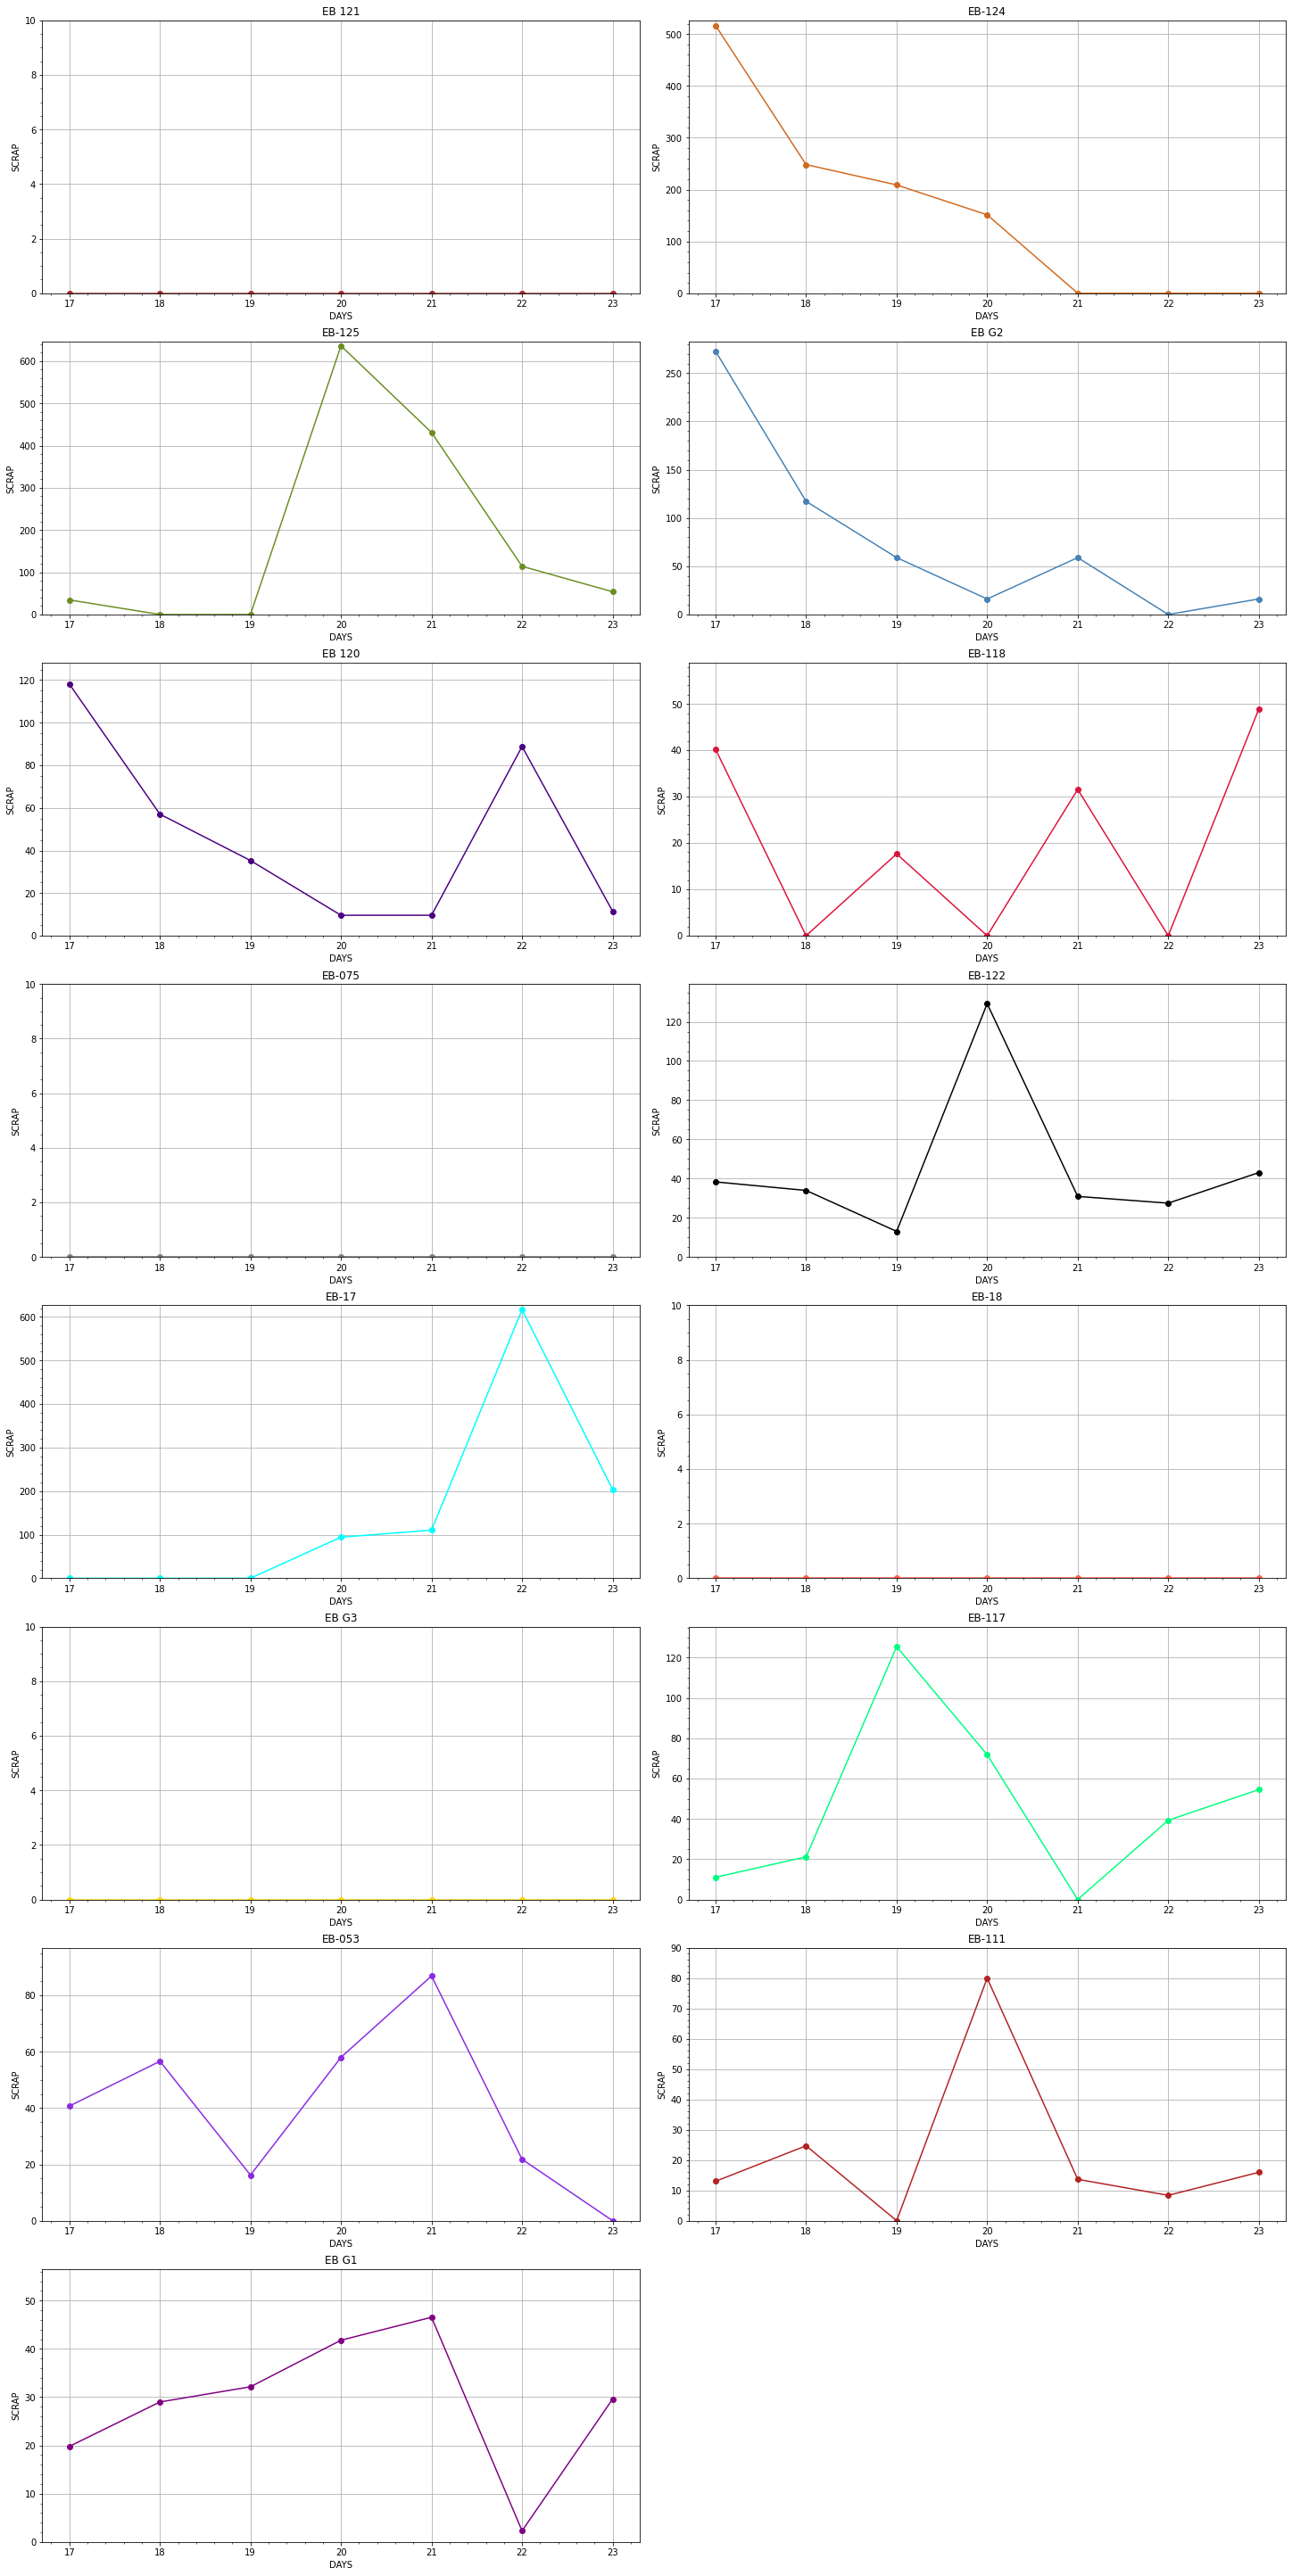

In [34]:
# tendency for scrap_vs_total_scrap
y_b = values_scrap_b
titles_b = []
for values in y_b.keys():
    titles_b.append(values)

fig_b = plt.figure(figsize=(20, 40), constrained_layout=True)

x = days
y_b = values_scrap_b
colors = ['brown','chocolate','olivedrab','steelblue','indigo','crimson','gray','black','cyan','tomato','gold','springgreen',
          'blueviolet','firebrick','purple']
sub = 1
for value in y_b.values():
    plt.subplot(8,2,sub)
    plt.plot( x , value, 'o',ls = '-', markevery=1,c = colors[sub-1])
    plt.title(titles_b[sub-1])
    plt.ylabel('SCRAP')
    plt.xlabel('DAYS')
    plt.ylim(0,max(value)+10) # greater value of list
    sub = sub +1
    plt.grid(True)
    plt.minorticks_on()

#plt.show()
plt.savefig('tendency_scrap_vs_total_scrap.pdf')